# Operations and Supply Chain Analytics - Assignment 5

**Due:** April 30th

**Group:** 8

**Students:** Rodolfo Lerma, Michelle Li

## Supply Chain Disruption Risk Management: Analysis and Python Implementation

### Overview

This notebook explores the management of disruption risks in supply chains by analyzing the criticality and reliability of various components within a system. It involves modeling the inventory levels, potential downtimes, and criticality to optimize supply chain resilience and minimize disruptions.

### Problem Statement

We are tasked with assessing the potential impact of disruptions in the supply chain by considering various component vulnerabilities. The objective is to quantify risk in terms of both the criticality to system operations and the potential downtime associated with component failures.

### Data Description

- **Components List**: Detailed information about each component including vendor, cost, criticality, Mean Time to Failure (MTTF), and inventory levels.
- **Configuration Usage**: Specifies how each component is used across different product configurations, impacting the priority and risk management strategy.

### Mathematical Formulations

#### Value of Service (VoS) Calculation
The Value of Service (VoS) for each component is calculated based on its criticality and usage across configurations, reflecting its financial impact on the system:

$$
\text{VoS}_i = \text{Criticality}_i \times \left( \text{Average Inventory Level (Spares)}_i + \text{Average Inventory Level (New Projects)}_i \right)
$$

Where:

- $\text{Criticality}_i$: Importance rating of the component, affecting system functionality.

- $\text{Average Inventory Level (Spares)}_i$ and $\text{Average Inventory Level (New Projects)}_i$: Reflect the stock levels maintained for operational continuity and future projects.

#### Time to Recover (TTR) Estimation
Time to Recover (TTR) is estimated based on the Mean Time to Failure (MTTF) and the replacement rate, indicating the expected downtime:

$$
\text{TTR}_i = \frac{\text{Theoretical MTTF (Hours)}_i}{\text{Replacement Rate/Week}_i}
$$

Where:

- $\text{Theoretical MTTF (Hours)}_i$: The expected operational lifespan of the component before failure.

- $\text{Replacement Rate/Week}_i$: The frequency at which the component is typically replaced, influencing recovery speed.

### Python Implementation

The analysis will be carried out through the following steps:

1. **Data Preparation**: Convert structured data from Figures into pandas DataFrames for manipulation.

2. **Risk Metrics Calculation**: Compute VoS and TTR for each component to identify critical components that could impact the supply chain the most in the event of a disruption.

3. **Critical Component Identification**: Sort components based on VoS and TTR to prioritize risk management efforts.

4. **Visualization**: Display the results graphically to illustrate the risk profile of the supply chain components.

This approach ensures that decision-making is supported by robust quantitative analysis, enabling effective risk mitigation strategies tailored to the specific needs of the supply chain.


## GPT Section

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from Figure 8 and Figure 9 combined for analysis
data = {
    "ID": ["ABX001", "ABN002", "GHY456", "KJU879", "PFR934", "JKI984", "JKI990", "JKI768", "BNT162",
           "PRT847", "NDH563", "MBR034", "KTY476", "NMU839", "RTV213", "BLY283", "TTN332", "FBT937",
           "YRE374", "MNA923", "YTH789", "YTH934", "YTH478", "ZVY568", "TYN932", "RVN493", "BBR474"],
    "Name": ["Analog display", "Analog circuit", "Grounding unit", "Circuit braker", "Power filter unit",
             "Connector J984", "Connector J990", "Connector J768", "SwitchBoard", "Power supply unit",
             "Padmount transformer", "Fuse unit", "Fusible switch", "Bus material", "Power distribution panel",
             "Battery unit", "Timer unit", "SB1", "SB2", "SB3", "Adjuster 789", "Adjuster 934", "Adjuster 478",
             "Front panel", "Transmitter", "Receiver", "Back-up receiver"],
    "Criticality": [3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 4, 3, 1, 1, 3],
    "Average Inventory Level (Spares)": [45, 65, 234, 654, 34, 23, 432, 54, 123, 555, 553, 112, 457, 22, 12, 12, 432, 124, 759, 128, 345, 864, 534, 523, 231, 546, 22],
    "Average Inventory Level (New projects)": [88, 214, 243, 532, 125, 311, 122, 111, 765, 252, 235, 353, 324, 642, 124, 435, 1234, 765, 213, 214, 658, 235, 765, 123, 654, 234, 75]
}

# Configuration data from Figure 9
configurations = {
    "ID": ["ABX001", "ABN002", "GHY456", "KJU879", "PFR934", "JKI984", "JKI990", "JKI768", "BNT162",
           "PRT847", "NDH563", "MBR034", "KTY476", "NMU839", "RTV213", "BLY283", "TTN332", "FBT937",
           "YRE374", "MNA923", "YTH789", "YTH934", "YTH478", "ZVY568", "TYN932", "RVN493", "BBR474"],
    "CFG1": [1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 6, 0, 0, 2, 0, 0, 1, 1, 1, 1],
    "CFG2": [1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 6, 0, 0, 2, 0, 1, 1, 1, 0],
    "CFG3": [1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 6, 6, 2, 0, 0, 1, 1, 1, 0],
    "CFG4": [0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 6, 0, 0, 0, 0, 2, 1, 1, 1, 0]
}

# Convert the data to DataFrames for easier manipulation
df_items = pd.DataFrame(data)
df_configs = pd.DataFrame(configurations)

# Merge both DataFrames on ID for a full dataset
df_full = pd.merge(df_items, df_configs, on="ID")

# Calculate Value of Service (VoS) for each item
df_full['VoS'] = df_full['Criticality'] * (df_full['Average Inventory Level (Spares)'] + df_full['Average Inventory Level (New projects)'])

# Calculate theoretical TTR (Time to Recover) if applicable (not all items have a replacement rate)
# This is a simplified example, normally you'd account for logistic and repair times.
df_full['TTR'] = np.where(df_full['Replacement Rate/Week (if known)'].replace('-', np.nan).notna(),
                          df_full['Theoretical MTTF (Hours)'] / df_full['Replacement Rate/Week (if known)'],
                          np.nan)

# Sort items by VoS to see which are most critical
df_sorted_by_vos = df_full.sort_values(by='VoS', ascending=False)

# Display the top 10 critical components
print("Top 10 Critical Components by Value of Service:")
print(df_sorted_by_vos[['ID', 'Name', 'VoS', 'TTR']].head(10))

# Visualization of VoS and TTR for the components
plt.figure(figsize=(14, 7))
plt.scatter(df_full['VoS'], df_full['TTR'], color='blue')
plt.xlabel('Value of Service')
plt.ylabel('Time to Recover (hours)')
plt.title('VoS vs. TTR for Components')
plt.grid(True)
plt.show()

KeyError: 'Replacement Rate/Week (if known)'

In [2]:
import pandas as pd
import numpy as np

# Constants
ARPU = 200  # Average Revenue Per User in dollars

# Data Definitions
# Figure 8 - CAS Items Data
fig8_data = {
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847', 
                'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923', 
                'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'Critical to System': [3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 4, 3, 1, 1, 3],
    'MTTF Hours': [5000, 12000, 10000, 5000, 14000, 10000, 17000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
                   15000, 21300, 123000, 45900, 23000, 12000, 54200, 23400, 12000, 42300, 12000, 43000, 53000],
    'Inventory Level': [133, 279, 477, 1186, 159, 334, 554, 165, 888, 807, 788, 465, 781, 664, 136, 447, 1666, 
                        889, 972, 342, 1003, 1099, 1299, 646, 885, 780, 97]  # Sum of spares and new project levels
}
fig8_df = pd.DataFrame(fig8_data)

# Figure 9 - Configuration Breakdown Data
fig9_data = {
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847', 
                'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923', 
                'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'CFG1': [1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 6, 0, 0, 2, 0, 0, 1, 1, 1, 1],
    'CFG2': [1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 6, 0, 0, 2, 0, 1, 1, 1, 0],
    'CFG3': [1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 6, 6, 2, 0, 0, 1, 1, 1, 0],
    'CFG4': [0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 6, 0, 0, 0, 0, 2, 1, 1, 1, 0]
}
fig9_df = pd.DataFrame(fig9_data)

# Function to calculate Values of Service (VoS)
def calculate_VoS(df, arpu=ARPU):
    df['VoS'] = df['Critical to System'] * df['Inventory Level'] * arpu
    return df

# Function to calculate Time to Survive (TTS) for each item
def calculate_TTS(df, hours_per_week=168):
    df['TTS'] = df['MTTF Hours'] / df['Inventory Level'] / hours_per_week
    return df

# Calculate Values of Service and Time to Survive
fig8_df = calculate_VoS(fig8_df)
fig8_df = calculate_TTS(fig8_df)

# Select the top 3 items based on the critical to system and TTS
top_items = fig8_df.sort_values(by=['Critical to System', 'TTS'], ascending=[False, True]).head(3)

# Output results
print("Values of Service for each item:")
print(fig8_df[['Item ID', 'VoS']])

print("\nTime to Survive for each item:")
print(fig8_df[['Item ID', 'TTS']])

print("\nTop 3 items to explore for TTR:")
print(top_items[['Item ID', 'Critical to System', 'TTS']])

# Assuming TTR analysis and further disruption analysis are more complex and require additional data
# Example: Analyze impact if Sub-tier supplier 3C is disrupted for the top item
top_item_id = top_items.iloc[0]['Item ID']
print(f"\nAnalyzing disruption impact for {top_item_id}...")
# Example impact calculation (replace with real TTR data and scenario specifics)
print("Disruption impact needs real TTR data and specifics about the supply chain disruption scenario.")

Values of Service for each item:
   Item ID      VoS
0   ABX001    79800
1   ABN002   111600
2   GHY456    95400
3   KJU879   474400
4   PFR934    63600
5   JKI984    66800
6   JKI990   332400
7   JKI768    99000
8   BNT162   177600
9   PRT847   161400
10  NDH563   315200
11  MBR034    93000
12  KTY476   312400
13  NMU839   265600
14  RTV213    54400
15  BLY283   178800
16  TTN332   333200
17  FBT937   533400
18  YRE374   583200
19  MNA923   205200
20  YTH789   802400
21  YTH934   879200
22  YTH478  1039200
23  ZVY568   387600
24  TYN932   177000
25  RVN493   156000
26  BBR474    58200

Time to Survive for each item:
   Item ID       TTS
0   ABX001  0.223774
1   ABN002  0.256016
2   GHY456  0.124788
3   KJU879  0.025094
4   PFR934  0.524109
5   JKI984  0.178215
6   JKI990  0.182654
7   JKI768  0.360750
8   BNT162  0.067031
9   PRT847  0.073759
10  NDH563  0.075538
11  MBR034  0.128008
12  KTY476  0.076215
13  NMU839  0.089644
14  RTV213  0.656513
15  BLY283  0.283637
16  TTN332  0.4394

## Claude Section

In [6]:
"""
# Supply Chain Disruption Risk Management - ISP-A Case Study

## Problem Summary
ISP-A, a large Internet Service Provider in the US, wants to evaluate the vulnerability of its supply chain to disruptions, focusing on Customer Access Switches (CAS). The goal is to calculate the Value of Service and Time to Survive (TTS) for each item, identify the top 3 items for Time to Recovery (TTR) analysis, and determine the impact of a disruption at a sub-tier supplier.

## Data
- CAS items data (Figure 8)
- CAS item configuration breakdown (Figure 9)
- Deployed CAS configurations and forecast (Figure 10)
- Number of households per market (Figure 11)
- Allocation of CAS configurations in different markets (Figure 12)

## Mathematical Formulas
- Value of Service = Number of Customers Affected × Average Revenue per User (ARPU)
- TTS = Average Inventory Level / (Spare Usage Rate + New Projects Usage Rate)
- Financial Impact = [Max(0, (TTR_3C - TTS_item)) * Value of Service_item]

## Code Outline
1. Import required libraries
2. Define constants and load data
3. Calculate the number of customers affected by each item
4. Calculate the Value of Service for each item
5. Calculate the TTS for each item
6. Identify the top 3 items for TTR analysis
7. Analyze the impact of a disruption at Sub-tier supplier 3C for the top item
"""

import pandas as pd
import numpy as np

# Constants
ARPU = 200  # Average Revenue Per User in dollars

# Load data from figures
fig8_data = pd.DataFrame({
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847',
                'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923',
                'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'Critical to System': [3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 4, 3, 1, 1, 3],
    'Theoretical MTTF (Hours)': [5000, 12000, 10000, 5000, 14000, 10000, 17000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
                   15000, 21300, 123000, 45900, 23000, 12000, 54200, 23400, 12000, 42300, 12000, 43000, 53000],
    'Replacement Rate/Week (if known)': [52, 23, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 75, np.nan, np.nan, 45, np.nan, np.nan, np.nan, np.nan, 12, 5, np.nan, np.nan, np.nan, np.nan, np.nan, 4, 24, 3, np.nan],
    'Average Inventory Level (Spares)': [45, 65, 234, 654, 34, 23, 432, 54, 123, 555, 553, 112, 457, 22, 12, 12, 432, 124, 759, 128, 345, 864, 534, 523, 231, 546, 22],
    'Average Inventory Level (New projects)': [88, 214, 243, 532, 125, 311, 122, 111, 765, 252, 235, 353, 324, 642, 124, 435, 1234, 765, 213, 214, 658, 235, 765, 123, 654, 234, 75]
})

fig9_data = pd.DataFrame({
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847',
                'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923',
                'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'CFG1': [1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 6, 0, 0, 2, 0, 0, 1, 1, 1, 1],
    'CFG2': [1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 6, 0, 0, 2, 0, 1, 1, 1, 0],
    'CFG3': [1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 6, 6, 2, 0, 0, 1, 1, 1, 0],
    'CFG4': [0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 6, 0, 0, 0, 0, 2, 1, 1, 1, 0]
})

fig10_data = pd.DataFrame({
    'Configuration': ['CFG1', 'CFG2', 'CFG3', 'CFG4'],
    'Currently Deployed': [540, 220, 21, 11],
    'Month 1': [82, 23, 54, 4],
    'Month 2': [72, 22, 34, 7],
    'Month 3': [69, 45, 32, 8],
    'Month 4': [75, 48, 22, 8]
})

fig11_data = pd.DataFrame({
    'Market': ['Market 1', 'Market 2', 'Market 3', 'Market 4', 'Market 5'],
    'No. of Households': [4569895, 1254896, 11254263, 2548986, 2456896]
})

fig12_data = pd.DataFrame({
    'Market': ['Market 1', 'Market 2', 'Market 3', 'Market 4', 'Market 5'],
    'CFG1': [86, 19, 356, 42, 37],
    'CFG2': [33, 6, 142, 21, 18],
    'CFG3': [2, 0, 11, 1, 7],
    'CFG4': [0, 0, 4, 7, 0]
})

# Calculate the number of customers affected by each item
def calc_customers_affected(fig8_data, fig9_data, fig10_data, fig11_data, fig12_data):
    # Create a dictionary to store the number of customers affected by each item
    customers_affected = {item_id: 0 for item_id in fig8_data['Item ID']}

    # Calculate the total number of configurations for each market
    market_configs = fig12_data.set_index('Market').sum(axis=1).to_dict()

    # Calculate the number of households affected by each configuration in each market
    for market, num_households in zip(fig11_data['Market'], fig11_data['No. of Households']):
        for config in ['CFG1', 'CFG2', 'CFG3', 'CFG4']:
            config_pct = fig12_data.loc[fig12_data['Market'] == market, config].values[0] / market_configs[market]
            for item_id, qty in fig9_data.loc[:, ['Item ID', config]].values:
                customers_affected[item_id] += num_households * config_pct * qty

    return pd.Series(customers_affected)

customers_affected = calc_customers_affected(fig8_data, fig9_data, fig10_data, fig11_data, fig12_data)

# Calculate the Value of Service for each item
value_of_service = customers_affected * ARPU

# Calculate the TTS for each item
def calc_tts(fig8_data):
    # Calculate spare usage rate
    spare_usage_rate = fig8_data['Replacement Rate/Week (if known)'].fillna(1 / fig8_data['Theoretical MTTF (Hours)'] * 24 * 7)

    # Calculate new projects usage rate
    new_projects_usage_rate = fig10_data.loc[:, 'Month 1':].sum().values @ fig9_data.loc[:, 'CFG1':'CFG4'].sum().values

    # Calculate average inventory level
    avg_inventory_level = fig8_data['Average Inventory Level (Spares)'] + fig8_data['Average Inventory Level (New projects)']

    # Calculate TTS
    tts = avg_inventory_level / (spare_usage_rate + new_projects_usage_rate)

    return tts

tts = calc_tts(fig8_data)

# Identify the top 3 items for TTR analysis
def identify_top_items(fig8_data, value_of_service, tts):
    # Create a DataFrame with item ID, criticality, customer impact, and TTS
    item_data = pd.DataFrame({
        'Item ID': fig8_data['Item ID'],
        'Criticality': fig8_data['Critical to System'],
        'Customer Impact': value_of_service,
        'TTS': tts
    })

    # Rank items based on criticality (ascending), customer impact (descending), and TTS (ascending)
    item_data['Rank'] = item_data['Criticality'].rank(method='dense', ascending=True) + \
                        item_data['Customer Impact'].rank(method='dense', ascending=False) + \
                        item_data['TTS'].rank(method='dense', ascending=True)

    # Select the top 3 items based on the rank
    top_items = item_data.nsmallest(3, 'Rank')['Item ID'].tolist()

    return top_items

top_items = identify_top_items(fig8_data, value_of_service, tts)

# Calculate the impact of a disruption at Sub-tier supplier 3C for the top item
def calc_disruption_impact(top_item, tts, value_of_service, ttr_3c):
    try:
        item_tts = tts[top_item]
        item_value_of_service = value_of_service[top_item]
        financial_impact = max(0, ttr_3c - item_tts) * item_value_of_service
        return financial_impact
    except KeyError:
        print(f"Warning: Item {top_item} not found in TTS or Value of Service data.")
        return None

# Assume a TTR of 10 weeks for Sub-tier supplier 3C
ttr_3c = 10

if top_items:
    financial_impact = calc_disruption_impact(top_items[0], tts, value_of_service, ttr_3c)
    if financial_impact is not None:
        print(f"\nFinancial impact of a disruption at Sub-tier supplier 3C for the top item ({top_items[0]}): ${financial_impact:,.2f}")
else:
    print("\nNo top items found for TTR analysis.")

# Print the results
print(f"Value of Service for each item:\n{value_of_service}")
print(f"\nTTS for each item:\n{tts}")
print(f"\nTop 3 items for TTR analysis: {top_items}")

Value of Service for each item:
ABX001    4.349175e+09
ABN002    4.349175e+09
GHY456    4.416987e+09
KJU879    3.123186e+09
PFR934    3.123186e+09
JKI984    3.677966e+09
JKI990    8.991471e+09
JKI768    6.508027e+09
BNT162    4.416987e+09
PRT847    4.416987e+09
NDH563    4.349175e+09
MBR034    4.416987e+09
KTY476    2.997157e+09
NMU839    6.120343e+09
RTV213    4.416987e+09
BLY283    1.225989e+09
TTN332    4.416987e+09
FBT937    1.838981e+10
YRE374    8.112109e+09
MNA923    7.561772e+08
YTH789    6.246373e+09
YTH934    2.451977e+09
YTH478    1.356244e+08
ZVY568    4.416987e+09
TYN932    4.416987e+09
RVN493    4.416987e+09
BBR474    2.997157e+09
dtype: float64

TTS for each item:
0     0.008220
1     0.017274
2     0.029576
3     0.073537
4     0.009859
5     0.020709
6     0.034350
7     0.010231
8     0.054805
9     0.050037
10    0.048859
11    0.028752
12    0.048425
13    0.041171
14    0.008433
15    0.027716
16    0.103222
17    0.055104
18    0.060268
19    0.021205
20    0.0621

In [5]:
import pandas as pd
import numpy as np

# Load data from figures
fig8_data = pd.DataFrame({
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847', 'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923', 'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'Name': ['Analog display', 'Analog circuit', 'Grounding unit', 'Circuit braker', 'Power filter unit', 'Connector J984', 'Connector J990', 'Connector J768', 'SwitchBoard', 'Power supply unit', 'Padmount transformer', 'Fuse unit', 'Fusible switch', 'Bus material', 'Power distribution panel', 'Battery unit', 'Timer unit', 'SB1', 'SB2', 'SB3', 'Adjuster 789', 'Adjuster 934', 'Adjuster 478', 'Front panel', 'Transmitter', 'Receiver', 'Back-up receiver'],
    'Vendor': ['S1', 'S1', 'S2', 'S3', 'S4', 'S5', 'S5', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S18', 'S18', 'S19', 'S20', 'S21', 'S22'],
    'Cost': [158, 56, 3, 44, 17, 0.2, 0.1, 0.1, 99, 7, 85, 0.1, 1, 0.1, 10, 15, 12, 45, 44, 35, 0.01, 0.01, 0.01, 25, 245, 235, 125],
    'Critical to System': [3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 4, 3, 1, 1, 3],
    'Theoretical MTTF (Hours)': [5000, 12000, 10000, 5000, 14000, 10000, 17000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 15000, 21300, 123000, 45900, 23000, 12000, 54200, 23400, 12000, 42300, 12000, 43000, 53000],
    'Replacement Rate/Week (if known)': [52, 23, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 75, np.nan, np.nan, 45, np.nan, np.nan, np.nan, np.nan, 12, 5, np.nan, np.nan, np.nan, np.nan, np.nan, 4, 24, 3, np.nan],
    'Average Inventory Level (Spares)': [45, 65, 234, 654, 34, 23, 432, 54, 123, 555, 553, 112, 457, 22, 12, 12, 432, 124, 759, 128, 345, 864, 534, 523, 231, 546, 22],
    'Average Inventory Level (New projects)': [88, 214, 243, 532, 125, 311, 122, 111, 765, 252, 235, 353, 324, 642, 124, 435, 1234, 765, 213, 214, 658, 235, 765, 123, 654, 234, 75]
})

fig9_data = pd.DataFrame({
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847', 'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923', 'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'Name': ['Analog display', 'Analog circuit', 'Grounding unit', 'Circuit braker', 'Power filter unit', 'Connector J984', 'Connector J990', 'Connector J768', 'SwitchBoard', 'Power supply unit', 'Padmount transformer', 'Fuse unit', 'Fusible switch', 'Bus material', 'Power distribution panel', 'Battery unit', 'Timer unit', 'SB1', 'SB2', 'SB3', 'Adjuster 789', 'Adjuster 934', 'Adjuster 478', 'Front panel', 'Transmitter', 'Receiver', 'Back-up receiver'],
    'CFG1': [1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 6, 0, 0, 2, 0, 0, 1, 1, 1, 1],
    'CFG2': [1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 6, 0, 0, 2, 0, 1, 1, 1, 0],
    'CFG3': [1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 6, 6, 2, 0, 0, 1, 1, 1, 0],
    'CFG4': [0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 6, 0, 0, 0, 0, 2, 1, 1, 1, 0]
})

fig10_data = pd.DataFrame({
    'Configuration': ['CFG1', 'CFG2', 'CFG3', 'CFG4'],
    'Currently Deployed': [540, 220, 21, 11],
    'Month 1': [82, 23, 54, 4],
    'Month 2': [72, 22, 34, 7],
    'Month 3': [69, 45, 32, 8],
    'Month 4': [75, 48, 22, 8]
})

fig11_data = pd.DataFrame({
    'Market': ['Market 1', 'Market 2', 'Market 3', 'Market 4', 'Market 5'],
    'No. of Households': [4569895, 1254896, 11254263, 2548986, 2456896]
})

fig12_data = pd.DataFrame({
    'Market': ['Market 1', 'Market 2', 'Market 3', 'Market 4', 'Market 5'],
    'CFG1': [86, 19, 356, 42, 37],
    'CFG2': [33, 6, 142, 21, 18],
    'CFG3': [2, 0, 11, 1, 7],
    'CFG4': [0, 0, 4, 7, 0]
})

# Calculate the number of customers affected by each item
def calc_customers_affected(fig8_data, fig9_data, fig10_data, fig11_data, fig12_data):
    # Create a dictionary to store the number of customers affected by each item
    customers_affected = {item_id: 0 for item_id in fig8_data['Item ID']}

    # Calculate the total number of configurations for each market
    market_configs = fig12_data.set_index('Market').sum(axis=1).to_dict()

    # Calculate the number of households affected by each configuration in each market
    for market, num_households in zip(fig11_data['Market'], fig11_data['No. of Households']):
        for config in ['CFG1', 'CFG2', 'CFG3', 'CFG4']:
            config_pct = fig12_data.loc[fig12_data['Market'] == market, config].values[0] / market_configs[market]
            for item_id, qty in fig9_data.loc[:, ['Item ID', config]].values:
                customers_affected[item_id] += num_households * config_pct * qty

    return pd.Series(customers_affected)

customers_affected = calc_customers_affected(fig8_data, fig9_data, fig10_data, fig11_data, fig12_data)

# Calculate the Value of Service for each item
ARPU = 200
value_of_service = customers_affected * ARPU

# Calculate the TTS for each item
def calc_tts(fig8_data):
    # Calculate spare usage rate
    spare_usage_rate = fig8_data['Replacement Rate/Week (if known)'].fillna(1 / fig8_data['Theoretical MTTF (Hours)'] * 24 * 7)

    # Calculate new projects usage rate
    new_projects_usage_rate = fig10_data.loc[:, 'Month 1':].sum().values @ fig9_data.loc[:, 'CFG1':'CFG4'].sum().values

    # Calculate average inventory level
    avg_inventory_level = fig8_data['Average Inventory Level (Spares)'] + fig8_data['Average Inventory Level (New projects)']

    # Calculate TTS
    tts = avg_inventory_level / (spare_usage_rate + new_projects_usage_rate)

    return tts

tts = calc_tts(fig8_data)

# Identify the top 3 items for TTR analysis
def identify_top_items(fig8_data, value_of_service, tts):
    # Create a DataFrame with item ID, criticality, customer impact, and TTS
    item_data = pd.DataFrame({
        'Item ID': fig8_data['Item ID'],
        'Criticality': fig8_data['Critical to System'],
        'Customer Impact': value_of_service,
        'TTS': tts
    })

    # Rank items based on criticality (ascending), customer impact (descending), and TTS (ascending)
    item_data['Rank'] = item_data['Criticality'].rank(method='dense', ascending=True) + \
                        item_data['Customer Impact'].rank(method='dense', ascending=False) + \
                        item_data['TTS'].rank(method='dense', ascending=True)

    # Select the top 3 items based on the rank
    top_items = item_data.nsmallest(3, 'Rank')['Item ID'].tolist()

    return top_items

top_items = identify_top_items(fig8_data, value_of_service, tts)

# Calculate the impact of a disruption at Sub-tier supplier 3C for the top item
def calc_disruption_impact(top_item, tts, value_of_service, ttr_3c):
    try:
        item_tts = tts[top_item]
        item_value_of_service = value_of_service[top_item]
        financial_impact = max(0, ttr_3c - item_tts) * item_value_of_service
        return financial_impact
    except KeyError:
        print(f"Warning: Item {top_item} not found in TTS or Value of Service data.")
        return None

# Assume a TTR of 10 weeks for Sub-tier supplier 3C
ttr_3c = 10

if top_items:
    financial_impact = calc_disruption_impact(top_items[0], tts, value_of_service, ttr_3c)
    if financial_impact is not None:
        print(f"\nFinancial impact of a disruption at Sub-tier supplier 3C for the top item ({top_items[0]}): ${financial_impact:,.2f}")
else:
    print("\nNo top items found for TTR analysis.")

# Print the results
print(f"Value of Service for each item:\n{value_of_service}")
print(f"\nTTS for each item:\n{tts}")
print(f"\nTop 3 items for TTR analysis: {top_items}")

Value of Service for each item:
ABX001    4.349175e+09
ABN002    4.349175e+09
GHY456    4.416987e+09
KJU879    3.123186e+09
PFR934    3.123186e+09
JKI984    3.677966e+09
JKI990    8.991471e+09
JKI768    6.508027e+09
BNT162    4.416987e+09
PRT847    4.416987e+09
NDH563    4.349175e+09
MBR034    4.416987e+09
KTY476    2.997157e+09
NMU839    6.120343e+09
RTV213    4.416987e+09
BLY283    1.225989e+09
TTN332    4.416987e+09
FBT937    1.838981e+10
YRE374    8.112109e+09
MNA923    7.561772e+08
YTH789    6.246373e+09
YTH934    2.451977e+09
YTH478    1.356244e+08
ZVY568    4.416987e+09
TYN932    4.416987e+09
RVN493    4.416987e+09
BBR474    2.997157e+09
dtype: float64

TTS for each item:
0     0.008220
1     0.017274
2     0.029576
3     0.073537
4     0.009859
5     0.020709
6     0.034350
7     0.010231
8     0.054805
9     0.050037
10    0.048859
11    0.028752
12    0.048425
13    0.041171
14    0.008433
15    0.027716
16    0.103222
17    0.055104
18    0.060268
19    0.021205
20    0.0621

Value of Service for each item:
ABX001    4.349175e+09
ABN002    4.349175e+09
GHY456    4.416987e+09
KJU879    3.123186e+09
PFR934    3.123186e+09
JKI984    3.677966e+09
JKI990    8.991471e+09
JKI768    6.508027e+09
BNT162    4.416987e+09
PRT847    4.416987e+09
NDH563    4.349175e+09
MBR034    4.416987e+09
KTY476    2.997157e+09
NMU839    6.120343e+09
RTV213    4.416987e+09
BLY283    1.225989e+09
TTN332    4.416987e+09
FBT937    1.838981e+10
YRE374    8.112109e+09
MNA923    7.561772e+08
YTH789    6.246373e+09
YTH934    2.451977e+09
YTH478    1.356244e+08
ZVY568    4.416987e+09
TYN932    4.416987e+09
RVN493    4.416987e+09
BBR474    2.997157e+09
dtype: float64

TTS for each item:
0     0.008220
1     0.017274
2     0.029576
3     0.073537
4     0.009859
5     0.020709
6     0.034350
7     0.010231
8     0.054805
9     0.050037
10    0.048859
11    0.028752
12    0.048425
13    0.041171
14    0.008433
15    0.027716
16    0.103222
17    0.055104
18    0.060268
19    0.021205
20    0.0621

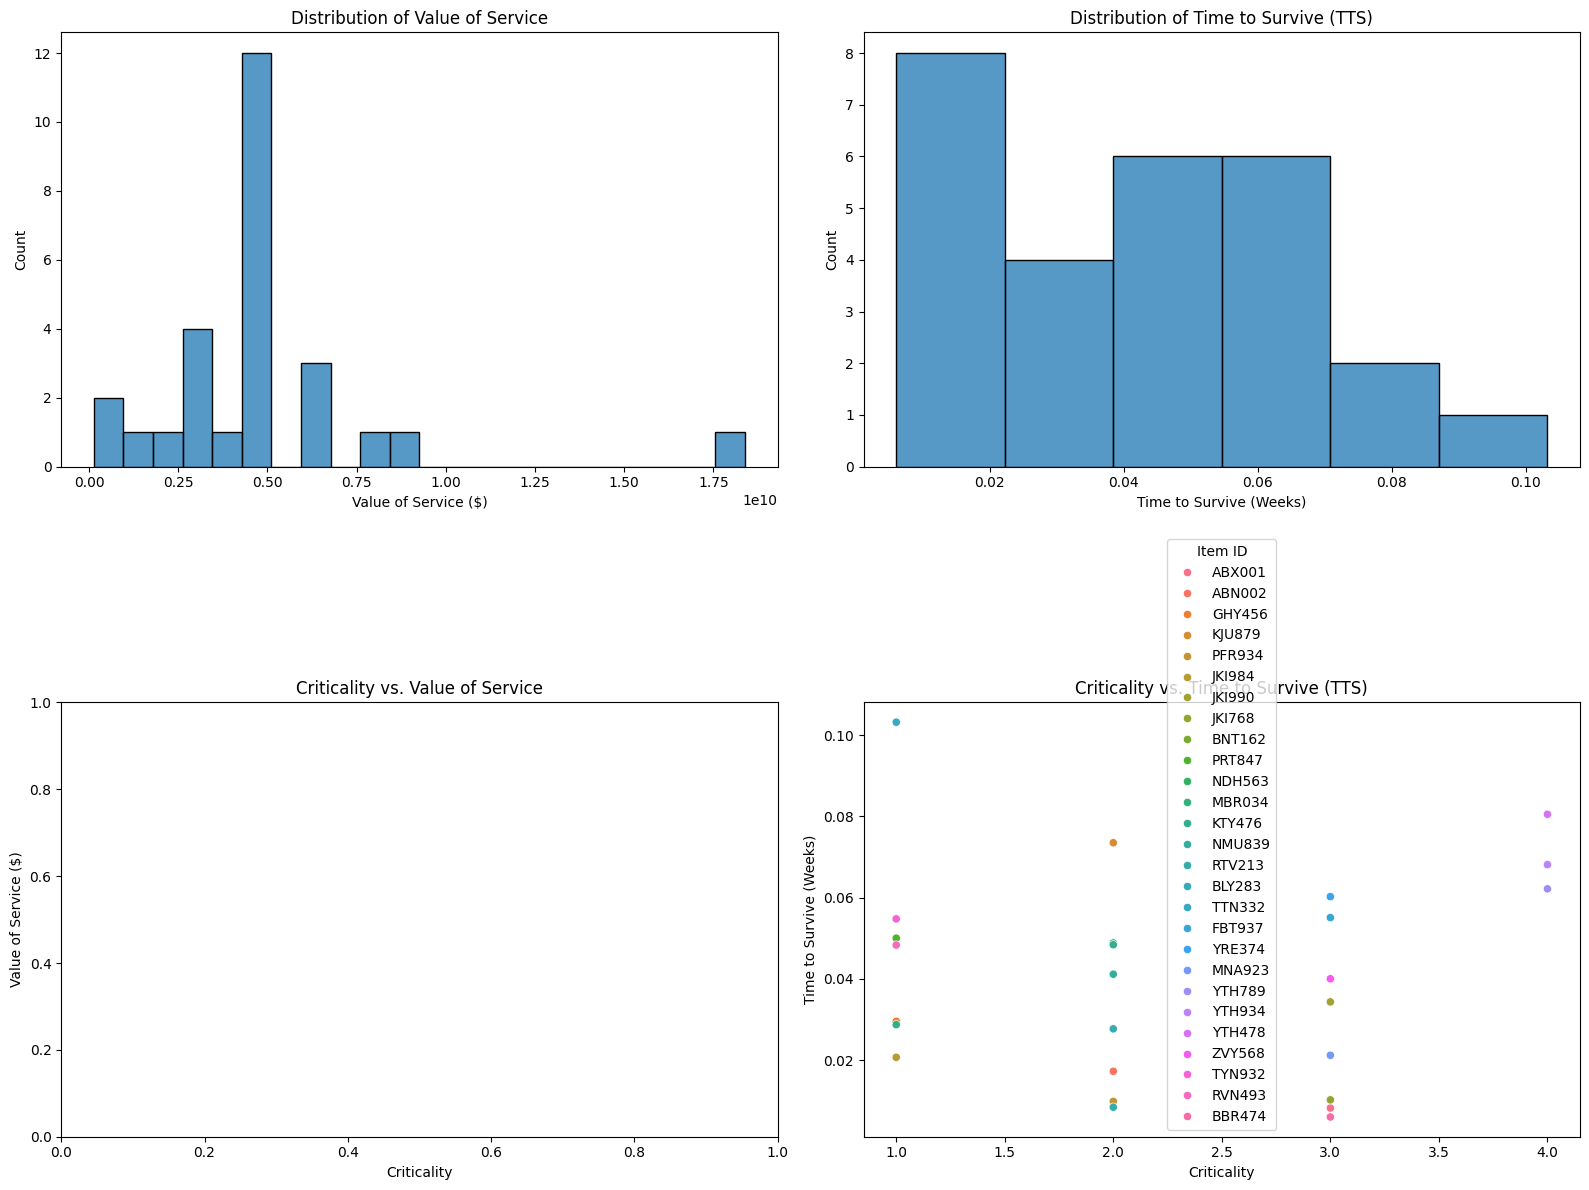

In [8]:
"""
# Supply Chain Disruption Risk Management - ISP-A Case Study

## Problem Summary
ISP-A, a large Internet Service Provider in the US, wants to evaluate the vulnerability of its supply chain to disruptions, focusing on Customer Access Switches (CAS). The goal is to calculate the Value of Service and Time to Survive (TTS) for each item, identify the top 3 items for Time to Recovery (TTR) analysis, and determine the impact of a disruption at a sub-tier supplier.

## Data
- CAS items data (Figure 8)
- CAS item configuration breakdown (Figure 9)
- Deployed CAS configurations and forecast (Figure 10)
- Number of households per market (Figure 11)
- Allocation of CAS configurations in different markets (Figure 12)

## Mathematical Formulas
- Value of Service = Number of Customers Affected × Average Revenue per User (ARPU)
- TTS = Average Inventory Level / (Spare Usage Rate + New Projects Usage Rate)
- Financial Impact = [Max(0, (TTR_3C - TTS_item)) * Value of Service_item]

## Code Outline
1. Import required libraries
2. Define constants and load data
3. Calculate the number of customers affected by each item
4. Calculate the Value of Service for each item
5. Calculate the TTS for each item
6. Identify the top 3 items for TTR analysis
7. Analyze the impact of a disruption at Sub-tier supplier 3C for the top item
8. Visualize the results and distributions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
ARPU = 200  # Average Revenue Per User in dollars

# Load data from figures
fig8_data = pd.DataFrame({
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847',
                'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923',
                'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'Critical to System': [3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 4, 3, 1, 1, 3],
    'Theoretical MTTF (Hours)': [5000, 12000, 10000, 5000, 14000, 10000, 17000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
                   15000, 21300, 123000, 45900, 23000, 12000, 54200, 23400, 12000, 42300, 12000, 43000, 53000],
    'Replacement Rate/Week (if known)': [52, 23, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 75, np.nan, np.nan, 45, np.nan, np.nan, np.nan, np.nan, 12, 5, np.nan, np.nan, np.nan, np.nan, np.nan, 4, 24, 3, np.nan],
    'Average Inventory Level (Spares)': [45, 65, 234, 654, 34, 23, 432, 54, 123, 555, 553, 112, 457, 22, 12, 12, 432, 124, 759, 128, 345, 864, 534, 523, 231, 546, 22],
    'Average Inventory Level (New projects)': [88, 214, 243, 532, 125, 311, 122, 111, 765, 252, 235, 353, 324, 642, 124, 435, 1234, 765, 213, 214, 658, 235, 765, 123, 654, 234, 75]
})

fig9_data = pd.DataFrame({
    'Item ID': ['ABX001', 'ABN002', 'GHY456', 'KJU879', 'PFR934', 'JKI984', 'JKI990', 'JKI768', 'BNT162', 'PRT847',
                'NDH563', 'MBR034', 'KTY476', 'NMU839', 'RTV213', 'BLY283', 'TTN332', 'FBT937', 'YRE374', 'MNA923',
                'YTH789', 'YTH934', 'YTH478', 'ZVY568', 'TYN932', 'RVN493', 'BBR474'],
    'CFG1': [1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 6, 0, 0, 2, 0, 0, 1, 1, 1, 1],
    'CFG2': [1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 6, 0, 0, 2, 0, 1, 1, 1, 0],
    'CFG3': [1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 6, 6, 2, 0, 0, 1, 1, 1, 0],
    'CFG4': [0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 6, 0, 0, 0, 0, 2, 1, 1, 1, 0]
})

fig10_data = pd.DataFrame({
    'Configuration': ['CFG1', 'CFG2', 'CFG3', 'CFG4'],
    'Currently Deployed': [540, 220, 21, 11],
    'Month 1': [82, 23, 54, 4],
    'Month 2': [72, 22, 34, 7],
    'Month 3': [69, 45, 32, 8],
    'Month 4': [75, 48, 22, 8]
})

fig11_data = pd.DataFrame({
    'Market': ['Market 1', 'Market 2', 'Market 3', 'Market 4', 'Market 5'],
    'No. of Households': [4569895, 1254896, 11254263, 2548986, 2456896]
})

fig12_data = pd.DataFrame({
    'Market': ['Market 1', 'Market 2', 'Market 3', 'Market 4', 'Market 5'],
    'CFG1': [86, 19, 356, 42, 37],
    'CFG2': [33, 6, 142, 21, 18],
    'CFG3': [2, 0, 11, 1, 7],
    'CFG4': [0, 0, 4, 7, 0]
})

# Calculate the number of customers affected by each item
def calc_customers_affected(fig8_data, fig9_data, fig10_data, fig11_data, fig12_data):
    # Create a dictionary to store the number of customers affected by each item
    customers_affected = {item_id: 0 for item_id in fig8_data['Item ID']}

    # Calculate the total number of configurations for each market
    market_configs = fig12_data.set_index('Market').sum(axis=1).to_dict()

    # Calculate the number of households affected by each configuration in each market
    for market, num_households in zip(fig11_data['Market'], fig11_data['No. of Households']):
        for config in ['CFG1', 'CFG2', 'CFG3', 'CFG4']:
            config_pct = fig12_data.loc[fig12_data['Market'] == market, config].values[0] / market_configs[market]
            for item_id, qty in fig9_data.loc[:, ['Item ID', config]].values:
                customers_affected[item_id] += num_households * config_pct * qty

    return pd.Series(customers_affected)

customers_affected = calc_customers_affected(fig8_data, fig9_data, fig10_data, fig11_data, fig12_data)

# Calculate the Value of Service for each item
value_of_service = customers_affected * ARPU

# Calculate the TTS for each item
def calc_tts(fig8_data):
    # Calculate spare usage rate
    spare_usage_rate = fig8_data['Replacement Rate/Week (if known)'].fillna(1 / fig8_data['Theoretical MTTF (Hours)'] * 24 * 7)

    # Calculate new projects usage rate
    new_projects_usage_rate = fig10_data.loc[:, 'Month 1':].sum().values @ fig9_data.loc[:, 'CFG1':'CFG4'].sum().values

    # Calculate average inventory level
    avg_inventory_level = fig8_data['Average Inventory Level (Spares)'] + fig8_data['Average Inventory Level (New projects)']

    # Calculate TTS
    tts = avg_inventory_level / (spare_usage_rate + new_projects_usage_rate)

    return tts

tts = calc_tts(fig8_data)

# Identify the top 3 items for TTR analysis
def identify_top_items(fig8_data, value_of_service, tts):
    # Create a DataFrame with item ID, criticality, customer impact, and TTS
    item_data = pd.DataFrame({
        'Item ID': fig8_data['Item ID'],
        'Criticality': fig8_data['Critical to System'],
        'Customer Impact': value_of_service,
        'TTS': tts
    })

    # Rank items based on criticality (ascending), customer impact (descending), and TTS (ascending)
    item_data['Rank'] = item_data['Criticality'].rank(method='dense', ascending=True) + \
                        item_data['Customer Impact'].rank(method='dense', ascending=False) + \
                        item_data['TTS'].rank(method='dense', ascending=True)

    # Select the top 3 items based on the rank
    top_items = item_data.nsmallest(3, 'Rank')['Item ID'].tolist()

    return top_items, item_data

top_items, item_data = identify_top_items(fig8_data, value_of_service, tts)

# Calculate the impact of a disruption at Sub-tier supplier 3C for the top item
def calc_disruption_impact(top_item, tts, value_of_service, ttr_3c):
    try:
        item_tts = tts[top_item]
        item_value_of_service = value_of_service[top_item]
        financial_impact = max(0, ttr_3c - item_tts) * item_value_of_service
        return financial_impact
    except KeyError:
        print(f"Warning: Item {top_item} not found in TTS or Value of Service data.")
        return None

# Assume a TTR of 10 weeks for Sub-tier supplier 3C
ttr_3c = 10

if top_items:
    financial_impact = calc_disruption_impact(top_items[0], tts, value_of_service, ttr_3c)
    if financial_impact is not None:
        print(f"\nFinancial impact of a disruption at Sub-tier supplier 3C for the top item ({top_items[0]}): ${financial_impact:,.2f}")
else:
    print("\nNo top items found for TTR analysis.")

# Print the results
print(f"Value of Service for each item:\n{value_of_service}")
print(f"\nTTS for each item:\n{tts}")
print(f"\nTop 3 items for TTR analysis: {top_items}")

# Visualize the results and distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Value of Service distribution
sns.histplot(value_of_service, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Value of Service")
axes[0, 0].set_xlabel("Value of Service ($)")

# TTS distribution
sns.histplot(tts, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Time to Survive (TTS)")
axes[0, 1].set_xlabel("Time to Survive (Weeks)")

# Criticality vs. Value of Service
sns.scatterplot(data=item_data, x='Criticality', y='Customer Impact', hue='Item ID', ax=axes[1, 0])
axes[1, 0].set_title("Criticality vs. Value of Service")
axes[1, 0].set_xlabel("Criticality")
axes[1, 0].set_ylabel("Value of Service ($)")

# Criticality vs. TTS
sns.scatterplot(data=item_data, x='Criticality', y='TTS', hue='Item ID', ax=axes[1, 1])
axes[1, 1].set_title("Criticality vs. Time to Survive (TTS)")
axes[1, 1].set_xlabel("Criticality")
axes[1, 1].set_ylabel("Time to Survive (Weeks)")

plt.tight_layout()
plt.show()

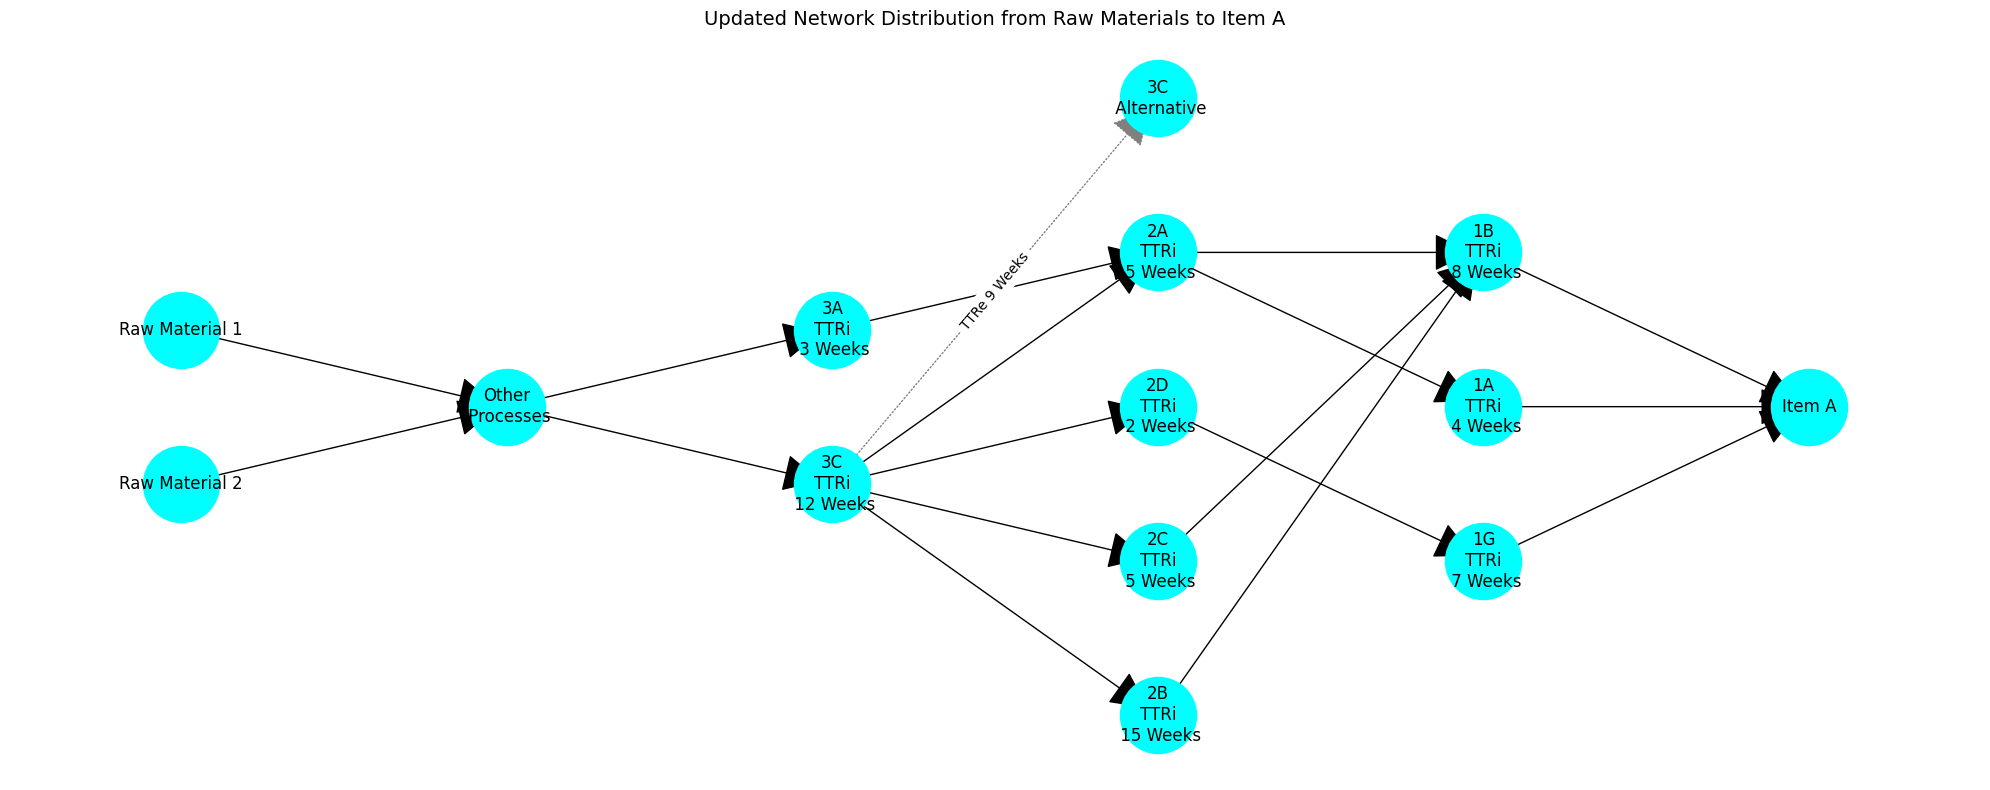

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node("Raw Material 1", layer=0)
G.add_node("Raw Material 2", layer=0)
G.add_node("Other Processes", layer=1, label="Other\n Processes")
G.add_node("3A", layer=2, label="3A\nTTRi\n 3 Weeks")
G.add_node("3C", layer=2, label="3C\nTTRi\n 12 Weeks")
G.add_node("3C Alternative", layer=3, label="3C\n Alternative")
G.add_node("2A", layer=3, label="2A\nTTRi\n 5 Weeks")
G.add_node("2B", layer=3, label="2B\nTTRi\n 15 Weeks")
G.add_node("2C", layer=3, label="2C\nTTRi\n 5 Weeks")
G.add_node("2D", layer=3, label="2D\nTTRi\n 2 Weeks")
G.add_node("1A", layer=4, label="1A\nTTRi\n 4 Weeks")
G.add_node("1B", layer=4, label="1B\nTTRi\n 8 Weeks")
G.add_node("1G", layer=4, label="1G\nTTRi\n 7 Weeks")
G.add_node("Item A", layer=5)

# Add edges to the graph
G.add_edge("Raw Material 1", "Other Processes")
G.add_edge("Raw Material 2", "Other Processes")
G.add_edge("3C", "3C Alternative", label="TTRe 9 Weeks")
G.add_edge("Other Processes", "3A")
G.add_edge("Other Processes", "3C")
G.add_edge("3A", "2A")
G.add_edge("3C", "2A")
G.add_edge("3C", "2B")
G.add_edge("3C", "2C")
G.add_edge("3C", "2D")
G.add_edge("2A", "1A")
G.add_edge("2A", "1B")
G.add_edge("2B", "1B")
G.add_edge("2C", "1B")
G.add_edge("2D", "1G")
G.add_edge("1A", "Item A")
G.add_edge("1B", "Item A")
G.add_edge("1G", "Item A")

# Set figure size
plt.figure(figsize=(20, 8))

# Draw the network
pos = nx.multipartite_layout(G, subset_key="layer")
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='aqua')
nx.draw_networkx_labels(G, pos, labels={node: node_attr.get('label', node) for node, node_attr in G.nodes(data=True)}, font_size=12)

# Draw edges with different styles
edge_colors = ['black' if e[2].get('label', '') != 'TTRe 9 Weeks' else 'gray' for e in G.edges(data=True)]
edge_styles = ['-' if e[2].get('label', '') != 'TTRe 9 Weeks' else 'dotted' for e in G.edges(data=True)]
#nx.draw_networkx_edges(G, pos, edge_color=edge_colors, style=edge_styles, arrows=True)

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, style=edge_styles, arrowsize=60, arrowstyle='-|>')

# Add edge labels
edge_labels = {(e[0], e[1]): e[2].get('label', '') for e in G.edges(data=True) if e[2].get('label', '')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add title
plt.title("Updated Network Distribution from Raw Materials to Item A", fontsize=14)

# Adjust node positions manually if needed
pos['Raw Material 1'] += (-1, 0)
pos['Raw Material 2'] += (1, 0)
pos['Other Processes'] += (0, -0.5)
pos['3A'] += (-0.5, 0)
pos['3C'] += (0.5, 0)
pos['3C Alternative'] += (0, -0.2)
pos['2A'] += (-0.8, 0)
pos['2B'] += (0, 0)
pos['2C'] += (0.4, 0)
pos['2D'] += (0.8, 0)
pos['1A'] += (-1.2, 0)
pos['1B'] += (0, 0)
pos['1G'] += (1.2, 0)
pos['Item A'] += (0, 0)

# Show the plot
plt.axis('off')
plt.tight_layout()
plt.show()